## Scraping Data Table from Wikipedia Link

In [120]:
from bs4 import BeautifulSoup
import requests

In [5]:
url = 'https://en.wikipedia.org/wiki/Tariffs_in_the_second_Trump_administration' #link to wikipedia 
page = requests.get(url)
soup = BeautifulSoup(page.text,'html')

In [6]:
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Tariffs in the second Trump administration - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-widt

In [17]:
#looking at SQL Understood there are many tables on page
#Extracted 2nd table as per requirement

soup.find_all('table')[2] 

<table class="wikitable sortable mw-collapsible floatright">
<caption><span class="anchor" id="List_of"></span><span class="nowrap">"Reciprocal tariffs" by country (April 2, 2025)<sup class="reference" id="cite_ref-reciprocalEO_95-0"><a href="#cite_note-reciprocalEO-95"><span class="cite-bracket">[</span>95<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-irishtimes/picture-reciprocal-tariffs_1-1"><a href="#cite_note-irishtimes/picture-reciprocal-tariffs-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-96"><a href="#cite_note-96"><span class="cite-bracket">[</span>96<span class="cite-bracket">]</span></a></sup></span>
</caption>
<tbody><tr>
<th scope="col">Country or territory
</th>
<th scope="col">Rate
</th></tr>
<tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding

In [26]:
#finding table using .find

table = soup.find('table',  class_ ='wikitable sortable mw-collapsible floatright')
print(table)

<table class="wikitable sortable mw-collapsible floatright">
<caption><span class="anchor" id="List_of"></span><span class="nowrap">"Reciprocal tariffs" by country (April 2, 2025)<sup class="reference" id="cite_ref-reciprocalEO_95-0"><a href="#cite_note-reciprocalEO-95"><span class="cite-bracket">[</span>95<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-irishtimes/picture-reciprocal-tariffs_1-1"><a href="#cite_note-irishtimes/picture-reciprocal-tariffs-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-96"><a href="#cite_note-96"><span class="cite-bracket">[</span>96<span class="cite-bracket">]</span></a></sup></span>
</caption>
<tbody><tr>
<th scope="col">Country or territory
</th>
<th scope="col">Rate
</th></tr>
<tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding

In [39]:
#extracting titles from table

titles = table.find_all('th')

In [40]:
titles

[<th scope="col">Country or territory
 </th>,
 <th scope="col">Rate
 </th>]

In [43]:
#extracting hyper as a list

title_head = [title.text.strip() for title in titles]
print(title_head)  

['Country or territory', 'Rate']


In [47]:
#header dataframe

import pandas as pd
df = pd.DataFrame(columns = title_head)
df

,Country or territory,Rate


In [54]:
#finding table rows

data =  table.find_all('tr')

In [55]:
data

[<tr>
 <th scope="col">Country or territory
 </th>
 <th scope="col">Rate
 </th></tr>,
 <tr>
 <td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/40px-Flag_of_Algeria.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/60px-Flag_of_Algeria.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/Algeria" title="Algeria">Algeria</a></td>
 <td>30%
 </td></tr>,
 <tr>
 <td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/23px-Flag_of_Angola.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/35p

In [60]:
#extracting row lists and adding in dataframe

for row in data[1:]:
    row_data = row.find_all('td')
    individual_row = [data_r.text.strip() for data_r in row_data]
    print(individual_row)
    
    length = len(df)
    df.loc[length]=individual_row

['Algeria', '30%']
['Angola', '32%']
['Bangladesh', '37%']
['Bosnia and Herzegovina', '35%']
['Botswana', '37%']
['Brunei', '24%']
['Cambodia', '49%']
['Cameroon', '11%']
['Chad', '13%']
['China', '34%']
['Democratic Republic of the Congo', '11%']
['Equatorial Guinea', '13%']
['European Union', '20%']
['Falkland Islands (United Kingdom)', '41%']
['Fiji', '32%']
['Guyana', '38%']
['India', '26%']
['Indonesia', '32%']
['Iraq', '39%']
['Israel', '17%']
['Ivory Coast', '21%']
['Japan', '24%']
['Jordan', '20%']
['Kazakhstan', '27%']
['Laos', '48%']
['Lesotho', '50%']
['Libya', '31%']
['Liechtenstein', '37%']
['Madagascar', '47%']
['Malawi', '17%']
['Malaysia', '24%']
['Mauritius', '40%']
['Moldova', '31%']
['Mozambique', '16%']
['Myanmar', '44%']
['Namibia', '21%']
['Nauru', '30%']
['Nicaragua', '18%']
['Nigeria', '14%']
['North Macedonia', '33%']
['Norway', '15%']
['Pakistan', '29%']
['Philippines', '17%']
['Serbia', '37%']
['South Africa', '30%']
['South Korea', '25%']
['Sri Lanka', '44%'

In [61]:
#printing dataframe
df

,Country or territory,Rate
0,Algeria,30%
1,Angola,32%
2,Bangladesh,37%
3,Bosnia and Herzegovina,35%
4,Botswana,37%
5,Brunei,24%
6,Cambodia,49%
7,Cameroon,11%
8,Chad,13%
9,China,34%


In [103]:
import matplotlib.pyplot as plt

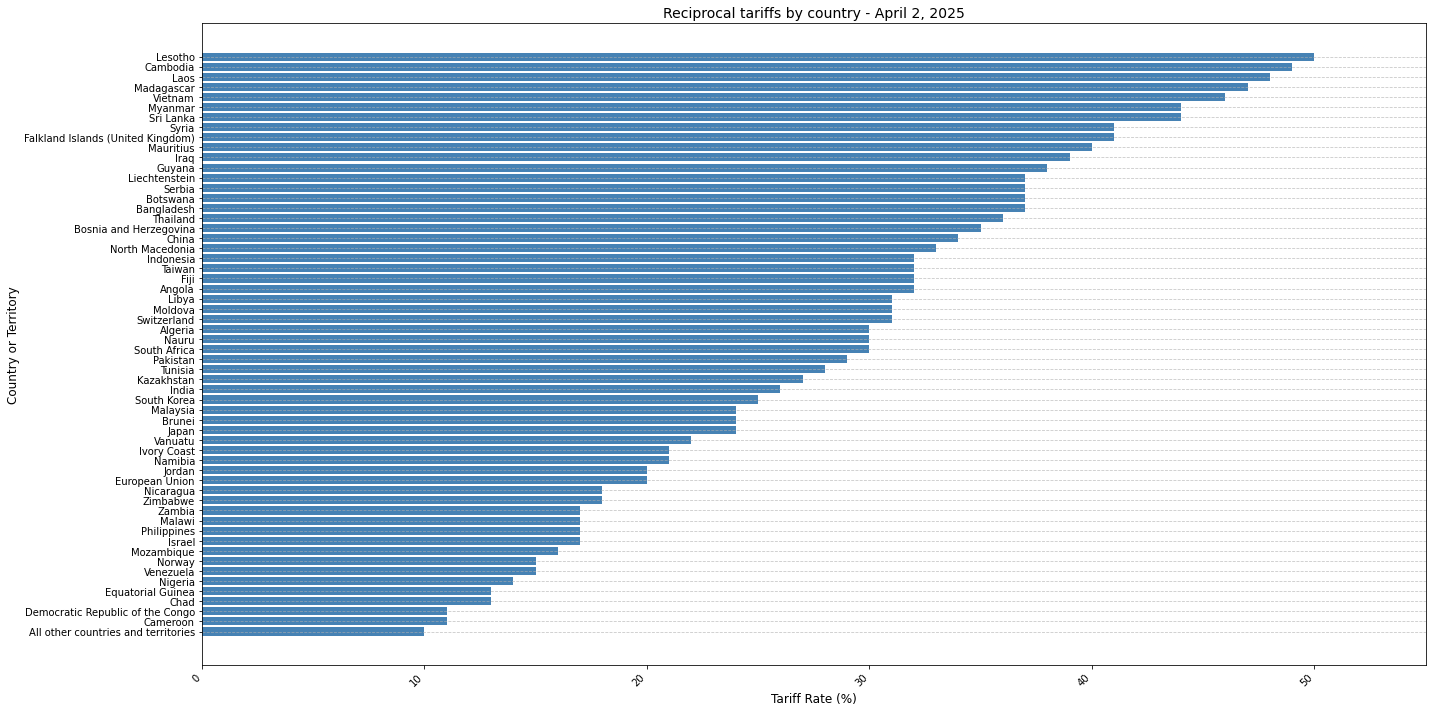

In [124]:
# Ensure 'Rate' is of string type before applying .str.replace
df['Rate'] = df['Rate'].astype(str)

# Remove the '%' sign and convert to float
df['Rate'] = df['Rate'].str.replace('%', '').astype(float)

# Sort the DataFrame by 'Rate' in descending order (now numeric)
df_sorted = df.sort_values(by='Rate', ascending=True)

# Normalize values for colormap not using for visualization
#This method adds color gradient
#norm = plt.Normalize(df_sorted['Rate'].min(), df_sorted['Rate'].max())
#colors = plt.cm.Blues(norm(df_sorted['Rate']))

# Plotting
plt.figure(figsize=(20, 10))
plt.barh(df_sorted['Country or territory'], df_sorted['Rate'], color='steelblue', height=0.8)
plt.title("Reciprocal tariffs by country - April 2, 2025", fontsize=14)
plt.xlabel("Tariff Rate (%)", fontsize=12)
plt.ylabel("Country or Territory", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlim(0, df_sorted['Rate'].max() + 5)  # X-axis starts at 0
plt.tight_layout()
plt.show()